In [6]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# open output file
out = open("output.txt", "a+")

# Question 1

# Loading data
df = pd.read_csv('imdb_master.csv', encoding='latin-1')
df = df.drop(df[df.label == 'unsup'].index)
sentences = df['review'].values
y = df['label'].values

# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Number of features
input_dim = 2000  # Fix 1, input dimension is same as number of words in tokenizer

# Build model
model = Sequential()
model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(
    layers.Dense(2, activation='softmax'))  # Fix 2, output 2 labels... Fix 3, activation softmax for categorical output
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

# output results
case = "Simple model on IMDB data set" + "\n"
loss, accuracy = model.evaluate(X_test, y_test)
results = case + "LOSS: {}".format(loss) + "\n" + "ACCURACY: {}".format(accuracy)
print(results)
out.write(results)

out.write("\n\n\n")

Train on 37500 samples, validate on 12500 samples
Epoch 1/5
37500/37500 [==============================] - 3s 83us/step - loss: 0.3462 - acc: 0.8510 - val_loss: 0.3133 - val_acc: 0.8700
Epoch 2/5
37500/37500 [==============================] - 3s 82us/step - loss: 0.2599 - acc: 0.8931 - val_loss: 0.2950 - val_acc: 0.8763
Epoch 3/5
37500/37500 [==============================] - 3s 83us/step - loss: 0.2116 - acc: 0.9164 - val_loss: 0.2932 - val_acc: 0.8778
Epoch 4/5
37500/37500 [==============================] - 3s 81us/step - loss: 0.1412 - acc: 0.9523 - val_loss: 0.3044 - val_acc: 0.8781
Epoch 5/5
12500/12500 [==============================] - 1s 52us/step
Simple model on IMDB data set
LOSS: 0.32579718297958377
ACCURACY: 0.8763999938964844


3

In [7]:
# Question 2
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

df = pd.read_csv('imdb_master.csv', encoding='latin-1')
df = df.drop(df[df.label == 'unsup'].index)
sentences = df['review'].values
y = df['label'].values

max_review_len = max([len(s.split()) for s in sentences])

# tokenizing data
tokenizer = Tokenizer(num_words=2470)
tokenizer.fit_on_texts(sentences)

# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# build model
model = Sequential()
model.add(Embedding(2470, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, input_dim=2470, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

case = "Simple model + embedded layer on IMDB data set" + "\n"
loss2, accuracy2 = model.evaluate(X_test, y_test)
results = case + "NEW LOSS: {} CHANGE: {}".format(loss2, loss2 - loss) + \
          "\n" + "NEW ACCURACY: {} CHANGE: {}".format(accuracy2, accuracy2 - accuracy)

print(results)
out.write(results)

out.write("\n\n\n")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 37500 samples, validate on 12500 samples
Epoch 1/5
37500/37500 [==============================] - 218s 6ms/step - loss: 0.6021 - acc: 0.7659 - val_loss: 0.2974 - val_acc: 0.8812
Epoch 2/5
37500/37500 [==============================] - 218s 6ms/step - loss: 0.2757 - acc: 0.8867 - val_loss: 0.2785 - val_acc: 0.8848
Epoch 3/5
37500/37500 [==============================] - 219s 6ms/step - loss: 0.2507 - acc: 0.8965 - val_loss: 0.2768 - val_acc: 0.8818
Epoch 4/5
37500/37500 [==============================] - 219s 6ms/step - loss: 0.2373 - acc: 0.9023 - val_loss: 0.2813 - val_acc: 0.8813
Epoch 5/5
12500/12500 [==============================] - 23s 2ms/step
Simple model + embedded layer on IMDB data set
NEW LOSS: 0.28294237694740293 CHANGE: -0.04285480603218084
NEW ACCURACY: 0.88264000415802 CHANGE: 0.0062400102615356445


3

In [8]:
# Question 3
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from keras.layers.embeddings import Embedding
from keras.layers import Flatten


twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
y = twenty_train.target
sentences = twenty_train.data

max_review_len = max([len(s.split()) for s in sentences])


tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

input_dim = 2000

# Build model
model = Sequential()
model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(20,
                       activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

# output results
case = "Simple model on news data set" + "\n"
loss, accuracy = model.evaluate(X_test, y_test)
results = case + "LOSS: {}".format(loss) + "\n" + "ACCURACY: {}".format(accuracy)
print(results)
out.write(results)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 1s 89us/step - loss: 2.1672 - acc: 0.4872 - val_loss: 1.3264 - val_acc: 0.7183
Epoch 2/5
8485/8485 [==============================] - 1s 86us/step - loss: 0.8785 - acc: 0.8280 - val_loss: 0.8289 - val_acc: 0.8070
Epoch 3/5
8485/8485 [==============================] - 1s 80us/step - loss: 0.5177 - acc: 0.8992 - val_loss: 0.6832 - val_acc: 0.8279
Epoch 4/5
8485/8485 [==============================] - 1s 85us/step - loss: 0.3578 - acc: 0.9348 - val_loss: 0.6120 - val_acc: 0.8378
Epoch 5/5
2829/2829 [==============================] - 0s 58us/step
Simple model on news data set
LOSS: 0.5831772812519364
ACCURACY: 0.8419936299324036


83

Rendering Loss/Acc Trends...


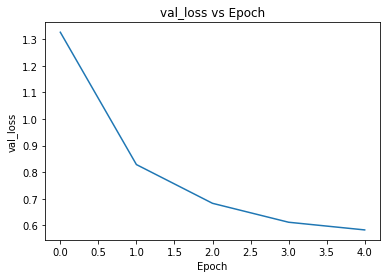

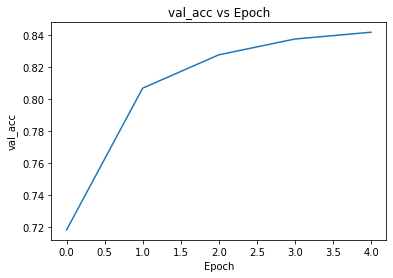

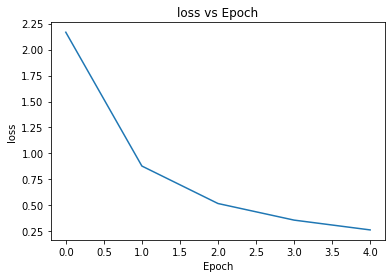

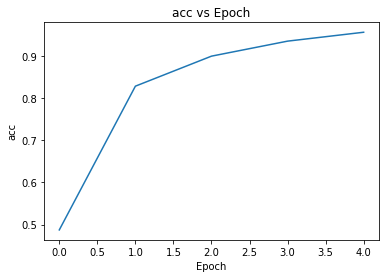

In [9]:
# bonus question 1
print("Rendering Loss/Acc Trends...")
for key in history.history:
    plt.plot(history.history[key])
    plt.title("{} vs Epoch".format(key))
    plt.ylabel(key)
    plt.xlabel('Epoch')
    plt.show()

In [0]:
# bonus question 2
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
y = twenty_test.target
sentences = twenty_test.data
labels = list(twenty_test.target_names)

single_x = sentences[5]
single_y = y[5]

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

sentences = tokenizer.texts_to_matrix(sentences)

out.write("Making prediction on single news file...")

out.write("\n")
out.write(str(single_x[:500]) + " ...")
out.write("\n")
out.write("Expected:" + str(labels[single_y]))

prediction = model.predict_classes(sentences[[5], :])[0]

out.write("Model prediction: " + str(labels[prediction]))

out.close()
